<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/machine_learning/blob/main/classes/class_march_17/clase_march_17_clasificacion_multietiqueta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Gradiente descendente estocástico

In [2]:
from sklearn.datasets import load_iris  

In [3]:
iris = load_iris()

In [4]:
X,y = load_iris(return_X_y = True) 

In [5]:
X.shape

(150, 4)

In [6]:
y_setosa = (y==0) 

In [7]:
X_sepal = X[:,(0,1)] 

In [8]:
X_sepal.shape 

(150, 2)

In [9]:
import matplotlib.pyplot as plt 

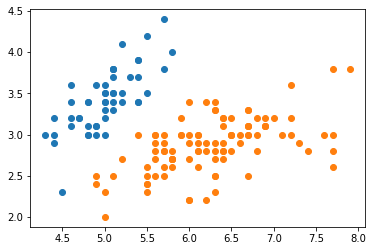

In [11]:
fig,ax = plt.subplots()

ax.scatter(X_sepal[:,0][y_setosa], X_sepal[:,1][y_setosa] )
ax.scatter(X_sepal[:,0][y_setosa==0], X_sepal[:,1][y_setosa==0] )

In [54]:
from sklearn.linear_model import SGDClassifier 

In [55]:
sgd_clf = SGDClassifier(max_iter = 5, tol = 1e-3, random_state = 42) 

In [56]:
sgd_clf.fit(X_sepal, y_setosa) 

C:\Users\Marco\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

In [57]:
b = sgd_clf.intercept_/ sgd_clf.coef_[0,1]  

In [58]:
b 

array([0.30931821])

In [59]:
sgd_clf.coef_ 


array([[-115.49456832,  163.52201258]])

In [60]:
sgd_clf.coef_.shape 


(1, 2)

In [61]:
m = -sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]  

In [62]:
m 

0.706293706293707

$$ w_{0} + w_{1}x_{1} + w_{2}x_{2} = 0 $$

$$ x_{2} = -\frac{w_{1}}{w_{2}}x_{1} - \frac{w_{0}}{w_{2}} $$

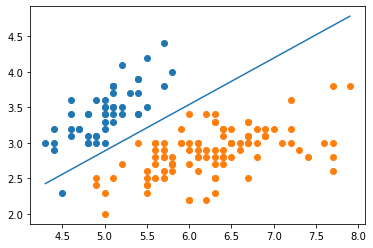

In [75]:
sgd_clf = SGDClassifier(max_iter = 100, tol = 1e-5, random_state = 42) 
sgd_clf.fit(X_sepal, y_setosa) 
import numpy as np 
fig,ax = plt.subplots()

ax.scatter(X_sepal[:,0][y_setosa], X_sepal[:,1][y_setosa] )
ax.scatter(X_sepal[:,0][y_setosa==0], X_sepal[:,1][y_setosa==0] )
c,d = np.min(X[:,0]), np.max(X[:,0]) 

m = -sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]  

b = -sgd_clf.intercept_/ sgd_clf.coef_[0,1] 

ax.plot([c,d], [m*c + b, m*d+b]) 

# Gradiente descendente para clasificación como función de un solo atributo

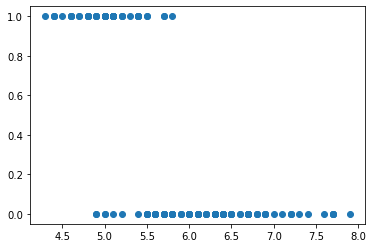

In [80]:
from sklearn.datasets import load_iris  
X,y = load_iris(return_X_y = True) 
y_setosa = (y==0) 
X_sepal = X[:,0] 
import matplotlib.pyplot as plt 
fig,ax = plt.subplots()

ax.scatter(X_sepal,y_setosa.ravel() )


In [85]:
def cost(w0):
    y_pred = 1*(X_sepal<=w0)
    return (1/len(X_sepal)*np.sum((y_setosa - y_pred)**2))

In [82]:
a,b = np.min(X_sepal), np.max(X_sepal) 

In [89]:
W0 = np.linspace(a,b,400) 

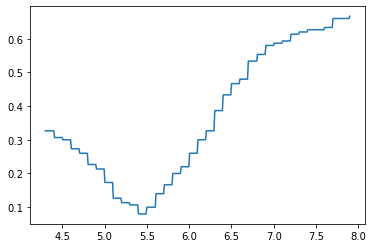

In [90]:
plt.plot(W0, [cost(w) for w in W0])

# The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution—in other words, a mathematical equation that gives the result directly.

This is called the Normal Equation (Equation 4-4).

Equation 4-4. Normal Equation  

$$ \hat{\theta}  = (X^{T}X)^{-1} X^{T}y $$


In this equation:  

* $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.  

* $y$ is the vector of target values containing $y^{(1)}$ to $y^{(m)}$ .

Let’s generate some linear-looking data to test this equation on (Figure 4-1):

In [92]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

<img src = ''>

Now let’s compute $\hat{\theta}$ using the Normal Equation. 

We will use the `inv()` function from NumPy’s linear algebra module (`np.linalg`) to compute the inverse of a matrix, and the `dot()` method for matrix multiplication:

In [93]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

The function that we used to generate the data is $y = 4 + 3x + \text{Gaussian noise}.$

Let’s see what the equation found:

In [94]:
theta_best

array([[4.12525018],
       [2.99665164]])

We would have hoped for θ = 4 and θ = 3 instead of θ = 4.215 and θ = 2.770.
Close enough, but the noise made it impossible to recover the exact parameters
of the original function.
Now we can make predictions using ˆ
𝛉
:

In [95]:
>>> X_new = np.array([[0], [2]])
>>> X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
>>> y_predict = X_new_b.dot(theta_best)
>>> y_predict

array([[ 4.12525018],
       [10.11855347]])

Let’s plot this model’s predictions (Figure 4-2):

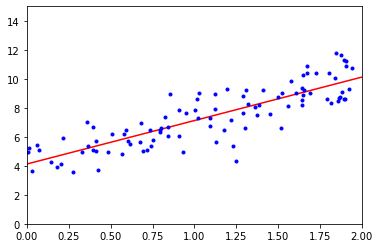

In [96]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Performing Linear Regression using Scikit-Learn is simple:

In [97]:
>>> from sklearn.linear_model import LinearRegression
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X, y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([4.12525018]), array([[2.99665164]]))

In [98]:
>>> lin_reg.predict(X_new)

array([[ 4.12525018],
       [10.11855347]])

The LinearRegression class is based on the scipy.linalg.lstsq() function
(the name stands for “least squares”), which you could call directly:

In [99]:
>>> theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
>>> theta_best_svd

array([[4.12525018],
       [2.99665164]])

This function computes ˆ
𝛉
= X+y, where X+ is the pseudoinverse of X
(specifically, the Moore-Penrose inverse). You can use np.linalg.pinv() to
compute the pseudoinverse directly:

In [ ]:
>>> np.linalg.pinv(X_b).dot(y)

The pseudoinverse itself is computed using a standard matrix factorization
technique called Singular Value Decomposition (SVD) that can decompose the
training set matrix X into the matrix multiplication of three matrices U Σ V (see
numpy.linalg.svd()). The pseudoinverse is computed as X+ = VΣ+U⊺. To
compute the matrix Σ+, the algorithm takes Σ and sets to zero all values smaller
than a tiny threshold value, then it replaces all the nonzero values with their
inverse, and finally it transposes the resulting matrix. This approach is more
efficient than computing the Normal Equation, plus it handles edge cases nicely:
indeed, the Normal Equation may not work if the matrix X X is not invertible
(i.e., singular), such as if m < n or if some features are redundant, but the
pseudoinverse is always defined.

## Computational Complexity

The Normal Equation computes the inverse of X X, which is an (n + 1) × (n +
1) matrix (where n is the number of features). The computational complexity of
inverting such a matrix is typically about O(n ) to O(n ), depending on the
implementation. In other words, if you double the number of features, you
multiply the computation time by roughly 2 = 5.3 to 2 = 8.

The SVD approach used by Scikit-Learn’s LinearRegression class is about
O(n ). If you double the number of features, you multiply the computation time
by roughly 4.

## WARNING

Both the Normal Equation and the SVD approach get very slow when the number of features
grows large (e.g., 100,000). On the positive side, both are linear with regard to the number of
instances in the training set (they are O(m)), so they handle large training sets efficiently,
provided they can fit in memory.
Also, once you have trained your Linear Regression model (using the Normal
Equation or any other algorithm), predictions are very fast: the computational
complexity is linear with regard to both the number of instances you want to
make predictions on and the number of features. In other words, making
predictions on twice as many instances (or twice as many features) will take
roughly twice as much time.

Now we will look at a very different way to train a Linear Regression model,
which is better suited for cases where there are a large number of features or too
many training instances to fit in memory.

## Gradient Descent

Page: 173

Gradient Descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. 

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet. 

A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. 

This is exactly what Gradient Descent does: it measures the local gradient of the error
function with regard to the parameter vector θ, and it goes in the direction of descending gradient. 

Once the gradient is zero, you have reached a minimum! 

Concretely, you start by filling θ with random values (this is called random initialization). 

Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum (see Figure 4-3).

<img src = ''>

An important parameter in Gradient Descent is the size of the steps, determined
by the learning rate hyperparameter. If the learning rate is too small, then the
algorithm will have to go through many iterations to converge, which will take a
long time (see Figure 4-4).

<img src = ''>

On the other hand, if the learning rate is too high, you might jump across the
valley and end up on the other side, possibly even higher up than you were
before. This might make the algorithm diverge, with larger and larger values,
failing to find a good solution (see Figure 4-5).

<img src = ''>

Finally, not all cost functions look like nice, regular bowls. There may be holes,
ridges, plateaus, and all sorts of irregular terrains, making convergence to the
minimum difficult. Figure 4-6 shows the two main challenges with Gradient
Descent. If the random initialization starts the algorithm on the left, then it will
converge to a local minimum, which is not as good as the global minimum. If it
starts on the right, then it will take a very long time to cross the plateau. And if
you stop too early, you will never reach the global minimum.

<img src = ''>

Fortunately, the MSE cost function for a Linear Regression model happens to be
a convex function, which means that if you pick any two points on the curve, the
line segment joining them never crosses the curve. This implies that there are no
local minima, just one global minimum. It is also a continuous function with a
slope that never changes abruptly. These two facts have a great consequence:
Gradient Descent is guaranteed to approach arbitrarily close the global minimum
(if you wait long enough and if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl
if the features have very different scales. 

Figure 4-7 shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

<img src = ''>

As you can see, on the left the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. 

It will eventually reach the minimum, but it will take a long time.

## WARNING

When using Gradient Descent, you should ensure that all features have a similar scale (e.g.,
using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.
This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). 

It is a search in the model’s parameter space: the more parameters a model has, the more dimensions this space has, and the harder the search is: searching for a needle in a 300-dimensional haystack is much trickier than in 3
dimensions. 

Fortunately, since the cost function is convex in the case of Linear
Regression, the needle is simply at the bottom of the bowl.

Batch Gradient Descent
To implement Gradient Descent, you need to compute the gradient of the cost
function with regard to each model parameter θ . In other words, you need to
calculate how much the cost function will change if you change θ just a little bit.
This is called a partial derivative. It is like asking “What is the slope of the mountain under my feet if I face east?” and then asking the same question facing
north (and so on for all other dimensions, if you can imagine a universe with
more than three dimensions). Equation 4-5 computes the partial derivative of the
cost function with regard to parameter θ , noted 

$$ \frac{\partial}{\partial \theta_{j}} MSE(\theta). $$

$$ \frac{\partial}{\partial \theta_{j}} MSE(\theta) = \frac{2}{m} \sum   $$

Instead of computing these partial derivatives individually, you can use Equation
4-6 to compute them all in one go. 

The gradient vector, noted $\nabla_{\theta} MSE(\theta)$, contains all the partial derivatives of the cost function (one for each model parameter).

$$ \nabla_{\theta}   $$

Once you have the gradient vector, which points uphill, just go in the opposite
direction to go downhill. This means subtracting ∇ MSE(θ) from θ. This is
where the learning rate η comes into play: multiply the gradient vector by η to
determine the size of the downhill step (Equation 4-7).

$$ \theta^{\text{next step}} =  $$


Let’s look at a quick implementation of this algorithm:

In [91]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

NameError: name 'X_b' is not defined

That wasn’t too hard! Let’s look at the resulting theta:

In [ ]:
theta

Hey, that’s exactly what the Normal Equation found! Gradient Descent worked perfectly. 

But what if you had used a different learning rate eta? Figure 4-8 shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point).

<img src = ''>

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. 

In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. 

On the right, the learning rate is too high: the algorithm diverges, jumping all over the
place and actually getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search (see Chapter 2). 

However,
you may want to limit the number of iterations so that grid search can eliminate
models that take too long to converge.

You may wonder how to set the number of iterations. If it is too low, you will
still be far away from the optimal solution when the algorithm stops; but if it is
too high, you will waste time while the model parameters do not change
anymore. A simple solution is to set a very large number of iterations but to
interrupt the algorithm when the gradient vector becomes tiny—that is, when its
norm becomes smaller than a tiny number ϵ (called the tolerance)—because this
happens when Gradient Descent has (almost) reached the minimum.

### CONVERGENCE RATE

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take O(1/ϵ) iterations to reach the optimum within a range of ϵ, depending on the shape of the cost function. 

If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

## Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow
when the training set is large. 

At the opposite extreme, Stochastic Gradient
Descent picks a random instance in the training set at every step and computes
the gradients based only on that single instance. Obviously, working on a single
instance at a time makes the algorithm much faster because it has very little data
to manipulate at every iteration. It also makes it possible to train on huge
training sets, since only one instance needs to be in memory at each iteration
(Stochastic GD can be implemented as an out-of-core algorithm; see Chapter 1).
On the other hand, due to its stochastic (i.e., random) nature, this algorithm is
much less regular than Batch Gradient Descent: instead of gently decreasing
until it reaches the minimum, the cost function will bounce up and down,
decreasing only on average. Over time it will end up very close to the minimum,
but once it gets there it will continue to bounce around, never settling down (see
Figure 4-9). So once the algorithm stops, the final parameter values are good,
but not optimal.

## Referencias  

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html